In [1]:
import sys
import os
import h5py
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
import importlib

sys.path.append('/om2/user/msaddler/python-packages/bez2018model_backup2020SEP09')
import bez2018model
importlib.reload(bez2018model)

sys.path.append('/om2/user/msaddler/python-packages/msutil')
import util_figures
import util_stimuli

import resource
resource.getrusage(resource.RUSAGE_SELF).ru_maxrss


107372

In [3]:
# DEFINE STIMULUS
random_seed = 10
np.random.seed(random_seed)

sr = 32000
fs = sr
f0 = 200
dur = 0.15
y = util_stimuli.complex_tone(f0,
                              fs,
                              dur=dur,
                              harmonic_numbers=np.arange(1, 600),
                              frequencies=None,
                              amplitudes=None,
                              phase_mode='sine',
                              offset_start=True,
                              strict_nyquist=False)
noise = util_stimuli.TENoise(fs, dur, dBSPL_per_ERB=70.0)
snr = np.inf
dBSPL = 60
y = util_stimuli.combine_signal_and_noise(y, noise, snr, mean_subtract=True)
y = util_stimuli.set_dBSPL(y, dBSPL)
ipd.display(ipd.Audio(y, rate=sr))


# fn = '/om/user/msaddler/data_hearinglossnet/hearinglossnet_diagnostic_snrN24P18P99.hdf5'
# with h5py.File(fn, 'r') as f:
#     for v in f.values():
#         print(v)
#     IDX = 500
#     sr = 20000
#     snr = 10
#     dBSPL = 60
#     y_fg = f['foreground_signal'][IDX][20000:]
#     y_bg = f['background_signal'][IDX][20000:]
#     y = util_stimuli.combine_signal_and_noise(y_fg, y_bg, snr, mean_subtract=True)
#     y = util_stimuli.set_dBSPL(y, dBSPL)
#     ipd.display(ipd.Audio(y, rate=sr))

        

In [6]:
# RUN `nervegram` model
kwargs_nervegram = {
    'nervegram_dur': 0.050,
    'nervegram_fs': 20e3,
    'buffer_start_dur': 0.070,
    'buffer_end_dur': 0.010,
    'pin_fs': 100e3,
    'pin_dBSPL_flag': 0,
    'pin_dBSPL': None,
    'species': 2,
    'bandwidth_scale_factor': 1,
    'cf_list': None,
    'num_cf': 100,
    'min_cf': 125.0,
    'max_cf': 8e3,
    'max_spikes_per_train': 500,
    'num_spike_trains': 20,
    'cohc': 1.0,
    'cihc': 1.0,
    'IhcLowPass_cutoff': 3000,
    'IhcLowPass_order': 7,
    'spont': 70.0,
    'noiseType': 1,
    'implnt': 0,
    'tabs': 6e-4,
    'trel': 6e-4,
    'random_seed': None,
    'return_vihcs': True,
    'return_meanrates': True,
    'return_spike_times': True,
    'return_spike_tensor': True,
}

list_out_dict = []
for _ in range(20):
#     np.random.seed(random_seed)
    t = time.time()
    out_dict = bez2018model.nervegram(y, sr, **kwargs_nervegram)
    print('TIME:', time.time() - t)
    print('MEMORY:', resource.getrusage(resource.RUSAGE_SELF).ru_maxrss)
#     list_out_dict.append(out_dict)
    print(out_dict['nervegram_spike_tensor'].sum())


for k in sorted(out_dict.keys()):
    print(k, np.array(out_dict[k]).dtype, np.array(out_dict[k]).shape)


# NEW_MEANRATES = out_dict['nervegram_meanrates'].copy()
# OLD_MEANRATES = np.squeeze(out_dict_old['meanrates'].copy())

# print(np.max(np.abs(OLD_MEANRATES - NEW_MEANRATES)))
# fig, ax = plt.subplots(figsize=(12,12))
# ax.plot(OLD_MEANRATES.reshape([-1]), NEW_MEANRATES.reshape([-1]), 'k.')
# plt.show()



TIME: 9.49750542640686
MEMORY: 191752
14491
TIME: 9.528224229812622
MEMORY: 207536
14719
TIME: 9.386305093765259
MEMORY: 207584
14612
TIME: 9.425368547439575
MEMORY: 207584
14802
TIME: 9.388851642608643
MEMORY: 207584
14558
TIME: 9.438916444778442
MEMORY: 207584
14711
TIME: 9.565211534500122
MEMORY: 207584
14548
TIME: 9.745349645614624
MEMORY: 207584
14467
TIME: 9.724129915237427
MEMORY: 207584
14780
TIME: 9.832255601882935
MEMORY: 207584
14543
TIME: 9.405761003494263
MEMORY: 207584
14785
TIME: 9.563947916030884
MEMORY: 207584
14723
TIME: 9.553247928619385
MEMORY: 207584
14653
TIME: 9.564548254013062
MEMORY: 207584
14547
TIME: 9.684251070022583
MEMORY: 207584
14525
TIME: 9.894906282424927
MEMORY: 207584
14554
TIME: 9.943125009536743
MEMORY: 207584
14658
TIME: 9.899986028671265
MEMORY: 207584
14725
TIME: 9.905547618865967
MEMORY: 207584
14803
TIME: 9.928248643875122
MEMORY: 207584
14653
IhcLowPass_cutoff int64 ()
IhcLowPass_order int64 ()
bandwidth_scale_factor float32 (100,)
buffer_end

In [ ]:
# RUN `nervegram_meanrates` model
kwargs_nervegram_meanrates = {
    'meanrates_params': {
#         'dur': 0.050,
        'fs': 20000,
#         'buffer_start_dur': 0.070,
#         'buffer_end_dur': 0.010,
    },
    'ANmodel_params': {
        'num_cfs': 100,
        'min_cf': 125.0,
        'max_cf': 14e3,
        'species': 2,
        'spont_list': [70],
        'cohc': 1.0,
        'bandwidth_scale_factor': 1.0,
        'IhcLowPass_cutoff': 3000.0,
        'IhcLowPass_order': 7,
        'noiseType': 1,
        'implnt': 0,
    },
    'random_seed': random_seed,
}

np.random.seed(random_seed)
t = time.time()
out_dict_old = bez2018model.nervegram_meanrates(y, sr, **kwargs_nervegram_meanrates)
print('TIME:', time.time() - t)
print('MEMORY:', resource.getrusage(resource.RUSAGE_SELF).ru_maxrss)



In [ ]:
'nervegram_meanrates'
'nervegram_vihcs'

X = list_out_dict[-1]['nervegram_meanrates']
Y = list_out_dict[0]['nervegram_meanrates']

print(np.abs(X - Y).max())


nervegram_mean = np.mean(np.stack([tmp['nervegram_meanrates'] for tmp in list_out_dict]), axis=0)
nervegram_mean.shape, X.shape


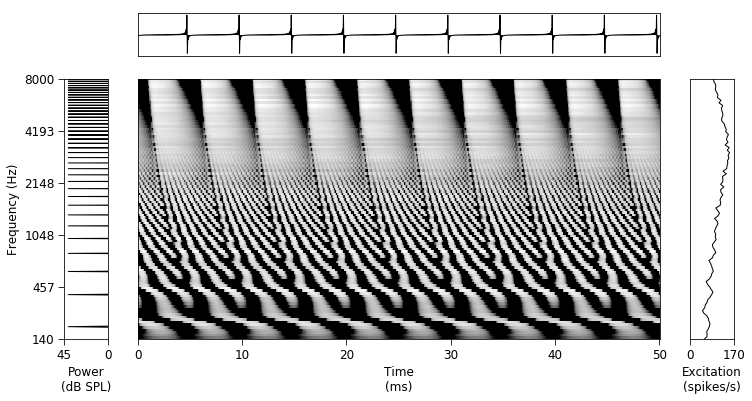

In [8]:
figsize=(12, 6)
nrows=2
ncols=3
gridspec_kw = {
    'wspace': 0.15,
    'hspace': 0.15,
    'width_ratios': [1, 12, 1],
    'height_ratios': [1, 6],
}

waveform = out_dict['pin']
sr_waveform = out_dict['pin_fs']
# nervegram = out_dict['nervegram_spike_tensor'].sum(axis=0)
nervegram = out_dict['nervegram_meanrates']
sr_nervegram = out_dict['nervegram_fs']

# waveform = out_dict_old['pin']
# sr_waveform = out_dict_old['pin_fs']
# nervegram = np.squeeze(out_dict_old['meanrates'])
# sr_nervegram = out_dict_old['meanrates_fs']

if True:
# for nervegram in [nervegram_mean]:
# for nervegram in [Y]:
    fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, gridspec_kw=gridspec_kw)
    util_figures.make_stimulus_summary_plot(ax_arr,
                                            ax_idx_waveform=1,
                                            ax_idx_spectrum=3,
                                            ax_idx_nervegram=4,
                                            ax_idx_excitation=5,
#                                             tmin=0.3,
#                                             tmax=0.4,
                                            waveform=waveform,
                                            nervegram=nervegram,
                                            sr_waveform=sr_waveform,
                                            sr_nervegram=sr_nervegram,
                                            cfs=out_dict['cf_list'])
    plt.tight_layout()
    plt.show()
    
#     fig.savefig('tmp.pdf', bbox_inches='tight', pad_inches=0, transparent=False)


In [ ]:
figsize=(12, 6)
nrows=2
ncols=3
gridspec_kw = {
    'wspace': 0.15,
    'hspace': 0.15,
    'width_ratios': [1, 8, 1],
    'height_ratios': [1, 4],
}

waveform = out_dict['pin']
sr_waveform = out_dict['pin_fs']
nervegram = out_dict['nervegram_meanrates']
sr_nervegram = out_dict['nervegram_fs']

fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, gridspec_kw=gridspec_kw)
util_figures.make_stimulus_summary_plot(ax_arr,
                                        ax_idx_waveform=1,
                                        ax_idx_spectrum=3,
                                        ax_idx_nervegram=4,
                                        ax_idx_excitation=5,
                                        waveform=waveform,
                                        nervegram=nervegram,
                                        sr_waveform=sr_waveform,
                                        sr_nervegram=sr_nervegram,
                                        cfs=out_dict['cf_list'])
plt.tight_layout()
plt.show()
    
# fig.savefig('tmp.pdf', bbox_inches='tight', pad_inches=0, transparent=False)


In [ ]:
kwargs_nervegram :  {
    'nervegram_dur': None,
    'nervegram_fs': 10e3,
    'buffer_start_dur': 0.0,
    'buffer_end_dur': 0.0,
    'pin_fs': 100e3,
    'pin_dBSPL_flag': 0,
    'pin_dBSPL': None,
    'species': 2,
    'bandwidth_scale_factor': 1.0,
    'cf_list': None,
    'num_cf': 50,
    'min_cf': 125.0,
    'max_cf': 8e3,
    'max_spikes_per_train': -1,
    'num_spike_trains': 40,
    'cohc': 1.0,
    'cihc': 1.0,
    'IhcLowPass_cutoff': 3e3,
    'IhcLowPass_order': 7,
    'spont': 70.0,
    'noiseType': 1,
    'implnt': 0,
    'tabs': 6e-4,
    'trel': 6e-4,
    'random_seed': None,
    'return_vihcs': True,
    'return_meanrates': True,
    'return_spike_times': True,
    'return_spike_tensor': True
}

In [ ]:
kwargs_nervegram_meanrates = {
    'meanrates_params': {
#         'dur': 0.050,
        'fs': 20e3,
        'buffer_start_dur': 0.07,
        'buffer_end_dur': 0.01,
    },
    'ANmodel_params': {
#         'cf_list': np.linspace(125, 8e3, 100),
        'num_cfs': 50,
        'min_cf': 125,
        'max_cf': 8e3,
        'species': 2,
        'spont_list': [70.0],
        'cohc': 1.0,
        'bandwidth_scale_factor': 1.0,
        'IhcLowPass_cutoff': 3000.0,
        'IhcLowPass_order': 7,
    },
}


sr = 32000
fs = sr
f0 = 240
dur = 0.150
y = util_stimuli.complex_tone(f0,
                              fs,
                              dur=dur,
                              harmonic_numbers=np.arange(1, 600),
                              frequencies=None,
                              amplitudes=None,
                              phase_mode='sine',
                              offset_start=True,
                              strict_nyquist=False)
noise = util_stimuli.TENoise(fs, dur, dBSPL_per_ERB=70.0)

snr = np.inf
dBSPL = 60
y = util_stimuli.combine_signal_and_noise(y, noise, snr, mean_subtract=True)
y = util_stimuli.set_dBSPL(y, dBSPL)


ipd.display(ipd.Audio(y, rate=sr))

np.random.seed(0)
out_dict = bez2018model.nervegram_meanrates(y, sr, **kwargs_nervegram_meanrates)
for k in out_dict.keys():
    if isinstance(out_dict[k], np.ndarray):
        print(k, out_dict[k].shape)

OLD_MEANRATES = out_dict['meanrates'].copy()


In [ ]:
# fxx, pxx = util_stimuli.power_spectrum(y, sr)

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
# ax.plot(fxx, pxx, color='k', lw=1)

# ax.set_xlim([0, 8050])
# ax.set_ylim([0, 30])
# ax.set_xlabel('Frequency (Hz)', fontsize=16)
# ax.set_ylabel('dB/Hz SPL', fontsize=16)
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# plt.show()


figsize=(12, 6)
nrows=2
ncols=3
gridspec_kw = {
    'wspace': 0.15,
    'hspace': 0.15,
    'width_ratios': [1, 8, 1],
    'height_ratios': [1, 4],
}

waveform = out_dict['signal']
sr_waveform = out_dict['signal_fs']
nervegram = out_dict['meanrates']
sr_nervegram = out_dict['meanrates_fs']

fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, gridspec_kw=gridspec_kw)
util_figures.make_stimulus_summary_plot(ax_arr,
                                        ax_idx_waveform=1,
                                        ax_idx_spectrum=None,
                                        ax_idx_nervegram=4,
                                        ax_idx_excitation=5,
                                        waveform=waveform,
                                        nervegram=nervegram,
                                        sr_waveform=sr_waveform,
                                        sr_nervegram=sr_nervegram,
                                        cfs=out_dict['cf_list'])
plt.tight_layout()
plt.show()


In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

color_list = ['k', 'b', 'r', 'y']
for cidx, IHC_cutoff in enumerate([5e3, 4e3, 3e3, 1e3]):

    kwargs_nervegram_meanrates = {
        'meanrates_params': {
            'dur': 0.050,
            'fs':100e3,
            'buffer_start_dur': 0.07,
            'buffer_end_dur': 0.01,
        },
        'ANmodel_params': {
            'num_cfs': 1,
            'min_cf':5000,
            'max_cf':5000,
            'spont_list':[70.0],
            'cohc':1.0,
            'bandwidth_scale_factor':1.0,
            'IhcLowPass_cutoff': IHC_cutoff,
            'IhcLowPass_order': 7,
        },
    }

    np.random.seed(0)
    out_dict = bez2018model.nervegram_meanrates(y, sr, **kwargs_nervegram_meanrates)

    pin_fs = out_dict['pin_fs']
    pin = out_dict['pin']
    mr_fs = out_dict['meanrates_fs']
    mr = out_dict['meanrates']
    freq = out_dict['cf_list']
    pin_fs = out_dict['pin_fs']

    fidx = 0
    print('cf=', freq[fidx])

    mr_trace = mr[fidx, :, 0]
    mr_time = np.arange(0, mr.shape[1]) / mr_fs

    fxx, pxx = util_stimuli.power_spectrum(mr_trace, mr_fs)

    ax[0].plot(mr_time, mr_trace, color=color_list[cidx])
    ax[1].plot(fxx, pxx, color=color_list[cidx], lw=4,
               label='IHC_cutoff={:.0f}Hz'.format(IHC_cutoff))

ax[0].set_xlim([mr_time[0], mr_time[-1]])
ax[0].set_ylabel('spikes/s')
ax[0].set_xlabel('time (s)')
ax[0].set_title('CF={:.2f}, Stimulus_F0={:.2f}'.format(freq[fidx], f0))
ax[1].legend(loc='upper right')

ax[1].set_xlim([0, 8e3])
ax[1].set_ylim([60, 120])
ax[1].set_ylabel('dB')
ax[1].set_xlabel('freq (Hz)')

plt.tight_layout()
plt.show()


In [ ]:
pin_fs = out_dict['pin_fs']
pin = out_dict['pin']
mr_fs = out_dict['meanrates_fs']
mr = out_dict['meanrates']
freq = out_dict['cf_list']
pin_fs = out_dict['pin_fs']

fidx = 0
print('cf=', freq[fidx])

mr_trace = mr[fidx, :, 0]
mr_time = np.arange(0, mr.shape[1]) / mr_fs

fxx, pxx = util_stimuli.power_spectrum(mr_trace, mr_fs)


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 4))
ax[0].plot(mr_time, mr_trace, color='k')
ax[0].set_xlim([mr_time[0], mr_time[-1]])
ax[0].set_ylabel('spikes/s')
ax[0].set_xlabel('time (s)')
ax[0].set_title('CF={:.2f}, IHC_cutoff={:.2f}'.format(freq[fidx], IHC_cutoff))


ax[1].axvline(IHC_cutoff, color='r', label='IHC_cutoff')
ax[1].axvline(5000, color='b', ls='--', lw=0.5, label='old Nyquist')
ax[1].plot(fxx, pxx, color='k')
ax[1].legend(loc='upper right')

ax[1].set_xlim([0, 8e3])
ax[1].set_ylabel('dB')
ax[1].set_xlabel('freq (Hz)')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

signal = np.random.randn(1000)
noise = np.random.rand(1000)

snr = 60

signal = signal - np.mean(signal)
noise = noise - np.mean(noise)

signal = 0.2 * signal


In [ ]:
# Test nervegram_psth
importlib.reload(bez2018model)

kwargs_nervegram_psth = {
    'nervegram_params': {
        'dur': 0.050,
        'fs': 10e3,
        'buffer_start_dur': 0.07,
        'buffer_end_dur': 0.01,
    },
    'ANmodel_params': {
        'num_anfs': 20,
        'num_cfs': 100,
        'min_cf': 125,
        'max_cf': 14e3,
        'spont_list': [70.0],
        'cohc': 1.0,
        'bandwidth_scale_factor': 1.0,
        'IhcLowPass_cutoff': 3000.0,
        'IhcLowPass_order': 7,
    },
}
out_dict = bez2018model.nervegram_psth(y, sr, **kwargs_nervegram_psth)

for k in sorted(out_dict.keys()):
    if isinstance(out_dict[k], np.ndarray):
        print(k, out_dict[k].shape, out_dict[k].dtype)
    else:
        print(k)


In [ ]:
# Debugging work for custom spike-sampling from meanrates

# rate = out_dict['nervegram_meanrates']
# rate_sr = out_dict['nervegram_fs']
# nervegram_binomial = np.zeros_like(out_dict['nervegram_psth'])
# for itrANF in range(nervegram_binomial.shape[-1]):
#     spikes = np.sign((rate/rate_sr) - np.random.rand(*rate.shape))
#     spikes[spikes < 0] = 0
#     nervegram_binomial[:, :, :, itrANF] = spikes

rate = np.zeros_like(out_dict['nervegram_psth'])
for itrANF in range(rate.shape[-1]):
    rate[:, :, :, itrANF] = out_dict['nervegram_meanrates'].copy()
print(rate.shape)

rate_sr = out_dict['nervegram_fs']
nervegram_binomial = np.zeros_like(out_dict['nervegram_psth'])
dur_refract = int(0.004 * rate_sr)
print(dur_refract)
for t in range(rate.shape[1]):
    t_prob = rate[:, t:t+1, :, :] / rate_sr
    t_spks = np.sign(t_prob - np.random.rand(*t_prob.shape))
    t_spks[t_spks < 0] = 0
#     if t < rate.shape[1] - 1:
#         t_end = min(t + 1 + dur_refract, rate.shape[1])
#         rate[:, t+1:t_end, :, :] *= t_spks == 0
    for t_refract in range(t + 1, t + 1 + dur_refract):
        if t_refract >= rate.shape[1]:
            break
        rate[:, t_refract:t_refract+1, :, :] *= t_spks == 0
    nervegram_binomial[:, t:t+1, :, :] = t_spks

nervegram_binomial.shape


In [ ]:
figsize=(12, 6)
nrows=2
ncols=3
gridspec_kw = {
    'wspace': 0.15,
    'hspace': 0.15,
    'width_ratios': [1, 8, 1],
    'height_ratios': [1, 4],
}

waveform = out_dict['signal']
sr_waveform = out_dict['signal_fs']
nervegram = np.sum(out_dict['nervegram_psth'][:, :, :, 0:200], axis=-1)
# nervegram = np.sum(nervegram_binomial[:, :, :, 0:200], axis=-1)
# nervegram = out_dict['nervegram_meanrates']
sr_nervegram = out_dict['nervegram_fs']

fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, gridspec_kw=gridspec_kw)
util_figures.make_stimulus_summary_plot(ax_arr,
                                        ax_idx_waveform=1,
                                        ax_idx_spectrum=3,
                                        ax_idx_nervegram=4,
                                        ax_idx_excitation=5,
                                        waveform=waveform,
                                        nervegram=nervegram,
                                        sr_waveform=sr_waveform,
                                        sr_nervegram=sr_nervegram,
                                        cfs=out_dict['cf_list'])
plt.tight_layout()
plt.show()




nervegram = np.sum(nervegram_binomial[:, :, :, 0:200], axis=-1)

fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, gridspec_kw=gridspec_kw)
util_figures.make_stimulus_summary_plot(ax_arr,
                                        ax_idx_waveform=1,
                                        ax_idx_spectrum=3,
                                        ax_idx_nervegram=4,
                                        ax_idx_excitation=5,
                                        waveform=waveform,
                                        nervegram=nervegram,
                                        sr_waveform=sr_waveform,
                                        sr_nervegram=sr_nervegram,
                                        cfs=out_dict['cf_list'])
plt.tight_layout()
plt.show()


In [ ]:
spike_counts_1 = []
spike_counts_2 = []

nervegram_1 = out_dict['nervegram_psth']
nervegram_2 = nervegram_binomial

print(nervegram_1.shape, nervegram_2.shape)
assert nervegram_1.shape == nervegram_2.shape
for _ in range(5000):
    idx_cf = np.random.randint(nervegram_1.shape[0])
    idx_dur = np.random.randint(nervegram_1.shape[1])
    idx_start = np.random.randint(nervegram_1.shape[1] - idx_dur)
    idx_anf = np.random.randint(nervegram_1.shape[3])
    
    spike_counts_1.append( np.sum(nervegram_1[idx_cf, idx_start:idx_start+idx_dur, 0, :]) )
    spike_counts_2.append( np.sum(nervegram_2[idx_cf, idx_start:idx_start+idx_dur, 0, :]) )

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(spike_counts_1, spike_counts_2, 'k.', ms=0.5)
ax.plot(spike_counts_1, spike_counts_1, 'r--')
ax.set_xlabel('bez2018model spike counts in random segments')
ax.set_ylabel('binomial spike counts in random segments')

plt.show()


In [ ]:
cf_idx = 48
num_anfs = 20

bez2018model_spikes = np.sum(out_dict['nervegram_psth'][cf_idx:cf_idx+1, :, :, -num_anfs:], axis=(0, 2, 3))
bez2018model_label = 'bez2018model ({} spikes)'.format(int(bez2018model_spikes.sum()))

binomial_spikes = np.sum(nervegram_binomial[cf_idx:cf_idx+1, :, :, -num_anfs:], axis=(0, 2, 3))
binomial_label = 'binomial ({} spikes)'.format(int(binomial_spikes.sum()))

fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(bez2018model_spikes + np.max(binomial_spikes) * 1.1, label=bez2018model_label)
ax.plot(binomial_spikes, label=binomial_label)
ax.legend()
plt.show()


In [ ]:
import cython_bez2018
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import time

cf = 250.0
pin_fs = 100e3
dur = 0.05
t = np.arange(0, dur, 1/pin_fs)
pin = 1e3*np.sin(2*np.pi*250.0*t)

nrep = 1

t0 = time.time()
for _ in range(nrep):
    vihc = cython_bez2018.run_ihc(pin,
                                  pin_fs,
                                  cf,
                                  species=2,
                                  bandwidth_scale_factor=1,
                                  cohc=1,
                                  cihc=1,
                                  IhcLowPass_cutoff=3000,
                                  IhcLowPass_order=7)
t1 = time.time()

for _ in range(nrep):
    np.random.seed(1)
    out_dict_tmp = cython_bez2018.run_anf(vihc,
                                          pin_fs,
                                          cf,
                                          num_spike_trains=16000,
                                          max_spikes_per_train=500)
t2 = time.time()

for _ in range(nrep):
    np.random.seed(1)
    out_dict = cython_bez2018.run_synapse(vihc,
                                          pin_fs,
                                          cf)
t3 = time.time()

print('time for run_ihc', (t1-t0)/nrep)
print('time for tmp_test', (t2-t1)/nrep)
print('time for run_synapse', (t3-t2)/nrep)

# fig, ax = plt.subplots(figsize=(10, 2))
# ax.plot(t, pin)
# ax.plot(sptime, np.zeros_like(sptime), '.')
# plt.show()
# fig, ax = plt.subplots(figsize=(10, 2))
# ax.plot(t, vihc)
# ax.plot(sptime, np.zeros_like(sptime), '.')
# plt.show()

x0 = out_dict_tmp['meanrate']
x1 = out_dict['meanrate']

for k in out_dict_tmp.keys():
    print(k, out_dict_tmp[k].shape, out_dict_tmp[k].max())

print(np.max(np.abs(x1-x0)))


In [ ]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(t, x0)
ax.plot(t, x1)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))

for n in range(out_dict_tmp['spike_times'].shape[0]):
    X = out_dict_tmp['spike_times'][n]
    X = X[X>0]
    ax.plot(X, np.ones_like(X) * n, '.')
plt.show()


t_bins = np.arange(0, dur, 1/10000)

hist, bin_edges = np.histogram(out_dict_tmp['spike_times'], t_bins)
fig, ax = plt.subplots(figsize=(18, 2))
ax.plot(t_bins[1:len(hist)], hist[1:])
plt.show()


In [ ]:
# X = out_dict_tmp['spike_times']
X = out_dict['nervegram_spike_times']
print(X.shape)

# X = X.reshape([-1, 40, 50, 500]).astype(np.float32)
X = np.expand_dims(X, axis=0)
shape_X = [None] + list(X.shape)[1:]
print(X.shape, X.dtype)
print(np.sum(X>0))
shape_X


In [ ]:
import tensorflow as tf
import pdb


def indices_to_multi_hot(tensor_spike_indices,
                         dur=2.0,
                         sr=10000):
    '''
    '''
    assert tensor_spike_indices.dtype == tf.dtypes.int64
    tmp_shape = tf.shape(tensor_spike_indices)
    tmp0 = tf.reshape(tensor_spike_indices, [-1, tmp_shape[-1]])
    tmp1 = tf.RaggedTensor.from_tensor(tmp0, padding=0)
    tmp2 = tf.zeros_like(tmp1) + tf.expand_dims(tf.range(tmp1.nrows()), axis=1)
    indices = tf.stack([tmp2.flat_values, tmp1.flat_values], axis=1)
    values = tf.ones_like(tmp1.flat_values, dtype=tf.dtypes.uint8)
    dense_shape = [tmp1.nrows(), int(dur * sr)]
    tmp3 = tf.sparse.to_dense(tf.sparse.SparseTensor(indices, values, dense_shape))
    tmp4 = tf.reshape(tmp3, tf.concat([tmp_shape[:-1], tmp3.shape[-1:]], axis=0))
    print('tmp0', tmp0.shape, tmp0.dtype)
    print('tmp1', tmp1.shape, tmp1.dtype)
    print('tmp2', tmp2.shape, tmp2.dtype)
    print('tmp3', tmp3.shape, tmp3.dtype)
    print('tmp4', tmp4.shape, tmp4.dtype)
    return tmp4

#     pdb.set_trace()
#     print('tensor_spike_indices', tensor_spike_indices.shape, tensor_spike_indices.dtype)
#     ragged_tensor_spike_indices = tf.RaggedTensor.from_tensor(tensor_spike_indices, padding=0)
#     pdb.set_trace()
    
#     def fn_1d(tensor_spike_indices):
#         tensor_spike_indices_exp = tf.expand_dims(tensor_spike_indices, axis=0)
#         ragged_spike_indices = tf.RaggedTensor.from_tensor(tensor_spike_indices_exp, padding=0)[0]
#         indices = tf.expand_dims(ragged_spike_indices, axis=-1)
#         values = tf.ones_like(ragged_spike_indices)
#         dense_shape = [int(dur * sr)]
#         sparse_tensor = tf.sparse.SparseTensor(indices, values, dense_shape)
#         return tf.sparse.to_dense(sparse_tensor)
    
#     fn_2d = lambda tensor_spike_indices: tf.map_fn(fn_1d,
#                                                    tensor_spike_indices,
#                                                    dtype=dtype,
#                                                    parallel_iterations=parallel_iterations)
#     fn_3d = lambda tensor_spike_indices: tf.map_fn(fn_2d,
#                                                    tensor_spike_indices,
#                                                    dtype=dtype,
#                                                    parallel_iterations=parallel_iterations)
#     fn_4d = lambda tensor_spike_indices: tf.map_fn(fn_3d,
#                                                    tensor_spike_indices,
#                                                    dtype=dtype,
#                                                    parallel_iterations=parallel_iterations)
#     return fn_4d(tensor_spike_indices)


# def indices_to_multi_hot(indices, depth, parallel_iterations=None, dtype=tf.dtypes.float32):
#     '''
#     This helper function converts spike time bin indices to a multi-hot array of spikes.
#     The explicit double nesting allows for tf.map_fn to serialize operations between and
#     within exemplars (preventing OOM due to large dimensions of tf.one_hot outputs).
#     NOTE: coding this as a loop will cause tensorflow errors (tensorfow 1.13.0-rc2).
#     '''
#     fn0 = lambda indices : tf.reduce_sum(tf.one_hot(indices, depth, axis=-1), axis=-2)
#     fn1 = lambda indices: tf.map_fn(fn0,
#                                     indices,
#                                     dtype=dtype,
#                                     parallel_iterations=parallel_iterations)
#     fn2 = lambda indices: tf.map_fn(fn1,
#                                     indices,
#                                     dtype=dtype,
#                                     parallel_iterations=parallel_iterations)
#     return fn2(indices)


def spike_times_to_spike_counts(tensor_spike_times,
                                dur,
                                sr,
                                n_subsample=None):
    '''
    '''
    # Subsample spike trains
    if n_subsample is None:
        subsampled_tensor_spike_times = tensor_spike_times
    else:
        msg = "n_subsample must be <= to {}".format(tensor_spike_times.shape[1])
        assert n_subsample <= tensor_spike_times.shape[1], msg
        fiber_indices = tf.range(tf.shape(tensor_spike_times)[1])
        sampled_fiber_indices = tf.random.shuffle(fiber_indices)[:n_subsample]
        subsampled_tensor_spike_times = tf.gather(tensor_spike_times,
                                                  sampled_fiber_indices,
                                                  axis=1)
    print('tensor_spike_times', tensor_spike_times.shape, tensor_spike_times.dtype)
    print('subsampled_tensor_spike_times', subsampled_tensor_spike_times.shape, subsampled_tensor_spike_times.dtype)
    # Convert lists of spike times to time bin indices (sampling rate = sr)
    tensor_spike_indices = tf.cast(subsampled_tensor_spike_times * sr, dtype=tf.dtypes.int64)
    # Convert lists of spike time indices to multi-hot spike vectors
    tensor_spike_multi_hot = indices_to_multi_hot(tensor_spike_indices,
                                                  dur=dur,
                                                  sr=sr)
    # Sum spikes across subsampled spike trains
#     if n_subsample is None:
#         sampled_tensor_spike_multi_hot = tensor_spike_multi_hot
#     else:
#         msg = "n_subsample must be <= to {}".format(tensor_spike_multi_hot.shape[1])
#         assert n_subsample <= tensor_spike_multi_hot.shape[1], msg
#         fiber_indices = tf.range(tf.shape(tensor_spike_multi_hot)[1])
#         sampled_fiber_indices = tf.random.shuffle(fiber_indices)[:n_subsample]
#         sampled_tensor_spike_multi_hot = tf.gather(tensor_spike_multi_hot,
#                                                    sampled_fiber_indices,
#                                                    axis=1)
    tensor_spike_counts = tf.reduce_sum(tensor_spike_multi_hot, axis=1)
    return tensor_spike_counts


tf.reset_default_graph()
dur = 0.050
sr = 20000
tensor_spike_times = tf.compat.v1.placeholder(X.dtype, shape=shape_X, name=None)
# tensor_spike_indices = tf.cast(tf.math.round(tensor_spike_times * sr), tf.dtypes.int64)
# print('INPUT', tensor_spike_indices.shape, tensor_spike_indices.dtype)
# # Y = tf.map_fn(indices_to_multi_hot,
# #               tensor_spike_indices[0, 0],
# #               dtype=tf.dtypes.int64)
# Y = indices_to_multi_hot(tensor_spike_indices)
# print('OUTPUT', Y.shape, Y.dtype)

print('INPUT', tensor_spike_times.shape, tensor_spike_times.dtype)
tensor_spike_counts = spike_times_to_spike_counts(tensor_spike_times,
                                                  dur,
                                                  sr,
                                                  n_subsample=None)
print('OUTPUT', tensor_spike_counts.shape, tensor_spike_counts.dtype)

with tf.Session() as sess:
    for _ in range(20):
        Y = sess.run(tensor_spike_counts, feed_dict={tensor_spike_times: X})
    #     print(Y, Y.shape)
        print(Y.max(), Y.min(), Y.sum(), Y.shape)
print('END')


In [ ]:
tf.__version__